# Laptop Fiyat Tahmin Projesi(Çoklu doğrusal regresyon)

## Kütüphanelerin yüklenmesi ve keşifçi veri analizi.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

İlk 5 satıra hızlıca bakış atalım.

In [2]:
df=pd.read_csv(r"C:\Users\E4EATLAS\Desktop\Veri Setleri\Laptop_price.csv")
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


Değişkenlerimizin veri yapılarına baktığımızda nesne,float ve int tipinde olduğunu görüyoruz.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [4]:
df.shape

(1000, 7)

Sütun adlarını türkçeye çevirelim.

In [15]:
df.columns=["Marka","İşlemci Hızı","Ram Miktarı","Depolama","Ekran Boyutu","Ağırlık","Fiyat"]
df.head(3)

,Marka,İşlemci Hızı,Ram Miktarı,Depolama,Ekran Boyutu,Ağırlık,Fiyat
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542


In [16]:
df["Marka"].unique()

array(['Asus', 'Acer', 'Lenovo', 'HP', 'Dell'], dtype=object)

Hiç eksik verimiz var mı kontrol edelim.

In [17]:
df.isna().sum()

Marka           0
İşlemci Hızı    0
Ram Miktarı     0
Depolama        0
Ekran Boyutu    0
Ağırlık         0
Fiyat           0
dtype: int64

Hiç tekrar eden verimiz var mı kontrol edelim.

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.describe()

,İşlemci Hızı,Ram Miktarı,Depolama,Ekran Boyutu,Ağırlık,Fiyat
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [20]:
sayısal_df=df.select_dtypes(include=["number"])
sayısal_df.head(3)

,İşlemci Hızı,Ram Miktarı,Depolama,Ekran Boyutu,Ağırlık,Fiyat
0,3.830296,16,512,11.185147,2.641094,17395.093065
1,2.912833,4,1000,11.311372,3.260012,31607.605919
2,3.241627,4,256,11.853023,2.029061,9291.023542


In [21]:
sayısal_df.corr()

,İşlemci Hızı,Ram Miktarı,Depolama,Ekran Boyutu,Ağırlık,Fiyat
İşlemci Hızı,1.000000,0.021391,-0.067576,-0.013425,-0.054603,-0.050737
Ram Miktarı,0.021391,1.000000,0.002111,-0.036002,-0.025382,0.061237
Depolama,-0.067576,0.002111,1.000000,-0.027560,0.041335,0.997908
Ekran Boyutu,-0.013425,-0.036002,-0.027560,1.000000,0.021995,-0.026740
Ağırlık,-0.054603,-0.025382,0.041335,0.021995,1.000000,0.038417
Fiyat,-0.050737,0.061237,0.997908,-0.026740,0.038417,1.000000


Markalara göre fiyatlara bakmak için groupby methodunu kullanıp büyükten küçüğe sıralayalım ve sütun grafiğini çizdirelim.

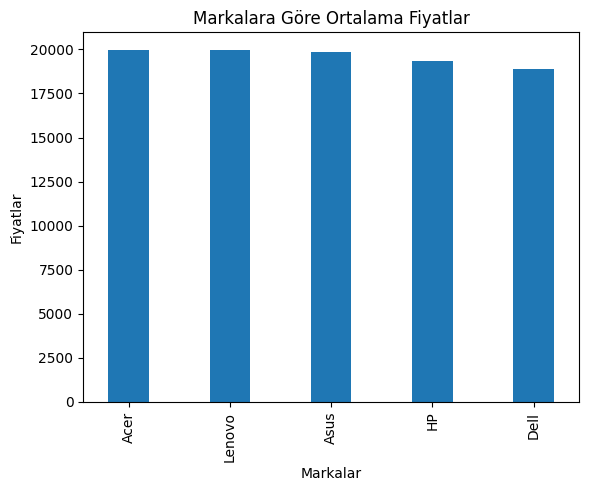

In [22]:
df.groupby("Marka")["Fiyat"].mean().sort_values(ascending=False).plot(kind="bar",width=0.4)
plt.title("Markalara Göre Ortalama Fiyatlar")
plt.xlabel("Markalar")
plt.ylabel("Fiyatlar")
plt.show()

## Model Eğitimi

In [67]:
y=df["Fiyat"]
x=df.drop(["Fiyat","Marka","Ekran Boyutu"],axis=1)


Sıralamanın x_train,x_test,y_train,y_test şeklinde olması çok önemli !
Modelinizi eğitirken ve tahmin yaparken kullandığınız veri setlerinin sütun isimlerinin aynı olduğundan emin olun.

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [76]:
y_pred = model.predict(x_test)

Ortalama hata karelere ve Belirlilik katsayısına bakalım.

In [83]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Square Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R² Skoru: {r2}")

Mean Square Error: 41015.835070869085
R² Skoru: 0.9995068418393286


Belirlilik katsayımız 1 e oldukça yakın çıktı,neredeyse burnunun dibinde.Bu modelimizin performansının iyi olduğunu gösterir.

In [86]:
model.score(x_test,y_test)

0.9995068418393286

Örnek tahminimiz.

In [92]:
model.predict([[2,4,1000,3]])

C:\Users\E4EATLAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31325.73296322])

Regresyon denklemimizin katsayılarını ve sabit terimlerini bulalım.

In [95]:
print(model.coef_)
print(model.intercept_)

[209.7398252   50.43786826  29.99614456  -3.37985805]
718.4968495883477
